# Unsupervised Learning
## Clusstering
## based on features //similar they are in the same clusster


# K-Means Clustering
## centroids s= b-a/max(a,b) --> silhouette coefficient
## -1 _____________ 1
## close to -1 not meaningfull

### ! variety of reactions
### ! number of comments
### ! number of shares

In [1]:
import pandas as pd 
dataset = pd.read_csv('Live.csv')
dataset.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video
0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0,0.0,0.0,0.0,1.0
1,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0
2,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0,0.0,0.0,0.0,1.0
3,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0
4,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0


In [7]:
from sklearn.cluster import KMeans
model= KMeans(n_clusters=3)
model.fit(dataset)


KMeans(n_clusters=3)

In [8]:
labels = model.predict(dataset)

In [9]:
import numpy as np
np.unique(labels, return_counts= True)

(array([0, 1, 2], dtype=int32), array([4288, 2334,  428]))

In [10]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouettes =[]
ks=list(range(2,12))



In [15]:
for n_cluster in ks:
  kmeans= KMeans(n_clusters=n_cluster).fit(dataset)
  label=kmeans.labels_
  sil_coeff= silhouette_score(dataset, label, metric='euclidean')
  print('For n_clusters= {}, The Silhouette Coefficient is {}'.format(n_cluster, sil_coeff))
  silhouettes.append(sil_coeff)



For n_clusters= 2, The Silhouette Coefficient is 0.8188237721696822
For n_clusters= 3, The Silhouette Coefficient is 0.8972493682244883
For n_clusters= 4, The Silhouette Coefficient is 0.9106664962327088
For n_clusters= 5, The Silhouette Coefficient is 0.8866768371183754
For n_clusters= 6, The Silhouette Coefficient is 0.8430118288915796
For n_clusters= 7, The Silhouette Coefficient is 0.8419421782294257
For n_clusters= 8, The Silhouette Coefficient is 0.8369757672176514
For n_clusters= 9, The Silhouette Coefficient is 0.7617091244770873
For n_clusters= 10, The Silhouette Coefficient is 0.7285062835963579
For n_clusters= 11, The Silhouette Coefficient is 0.7156506514696281


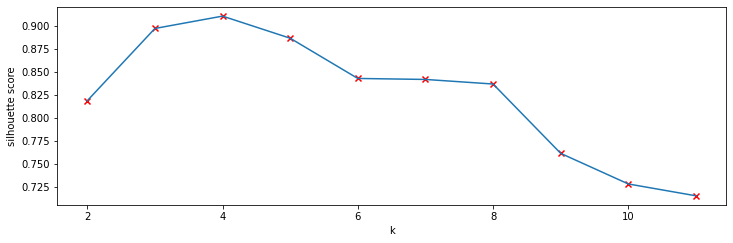

In [17]:
plt.figure(figsize=(12,8))
plt.subplot(211)
plt.scatter(ks, silhouettes, marker='x', c='r')
plt.plot(ks, silhouettes)
plt.xlabel('k')
plt.ylabel('silhouette score');



## 4 different group


In [18]:
from sklearn.cluster import KMeans
model= KMeans(n_clusters=4)
model.fit(dataset)
labels=model.predict(dataset)


In [19]:
import numpy as np
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3], dtype=int32), array([4288, 2334,  365,   63]))

In [20]:
dataset['labels']=labels
dataset['labels'].value_counts()


0    4288
1    2334
2     365
3      63
Name: labels, dtype: int64

# Acording to Comments


In [23]:
group_zero=dataset[dataset['labels']==0]['num_comments'].mean()
group_zero


0.0007619566531325948

In [24]:
group_one=dataset[dataset['labels']==1]['num_comments'].mean()
group_one

0.030608773182480054

In [25]:
group_two=dataset[dataset['labels']==2]['num_comments'].mean()
group_two

0.0017264581307471548

In [26]:
group_three=dataset[dataset['labels']==3]['num_comments'].mean()
group_three

0.00027148226290672723

# According to Share

In [27]:
group_zero=dataset[dataset['labels']== 0]['num_shares'].mean()
group_zero

0.0007458736181824375

In [28]:
group_one=dataset[dataset['labels']==1]['num_shares'].mean()
group_one

0.033785031713235436

In [29]:
group_two=dataset[dataset['labels']==2]['num_shares'].mean()
group_two

0.0007473434899500528

In [30]:
group_three=dataset[dataset['labels']==3]['num_shares'].mean()
group_three

0.001284119566829822

In [34]:
status_type=dataset[['status_type_photo', 'status_type_video', 'status_type_status']].idxmax(axis=1)
dataset=pd.concat([dataset['labels'], status_type.rename('status_type')], axis=1)


In [35]:
dataset.groupby(['labels','status_type',])['status_type'].count()

labels  status_type       
0       status_type_photo     4288
1       status_type_video     2334
2       status_type_status     365
3       status_type_photo       63
Name: status_type, dtype: int64